In [2]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [0]:
import pandas as pd
import numpy as np 
df = pd.read_csv("covid_19_clean_complete.csv", delimiter=",")
train_set, test_set= np.split(df, [int(.75 *len(df))])

In [0]:
train_set.tail(10)
test_set.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
24048,NaN,Slovenia,46.1512,14.9955,4/21/20,1344,77,197
24049,NaN,Somalia,5.1521,46.1996,4/21/20,286,8,4
24050,NaN,South Africa,-30.5595,22.9375,4/21/20,3465,58,1055
24051,NaN,Spain,40.0000,-4.0000,4/21/20,204178,21282,82514
24052,NaN,Sri Lanka,7.0000,81.0000,4/21/20,310,7,102
24053,NaN,Sudan,12.8628,30.2176,4/21/20,107,12,8
24054,NaN,Suriname,3.9193,-56.0278,4/21/20,10,1,6
24055,NaN,Sweden,63.0000,16.0000,4/21/20,15322,1765,550
24056,NaN,Switzerland,46.8182,8.2275,4/21/20,28063,1478,19400
24057,NaN,Taiwan*,23.7000,121.0000,4/21/20,425,6,217


In [3]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [96]:
df = pd.read_csv("covid_19_clean_complete.csv", delimiter=",")
df.groupby(['Country/Region']).sum()
a = df['Country/Region']
print(a)
df.groupby(['Confirmed']).sum()
b = df['Confirmed']
print(b)
# date = [elem for elem in df['Date']]
# values = [elem for elem in df['Confirmed']]
# plt.xticks(range(0,len(date)),rotation=45)
# plt.plot(country, values)
df = pd.read_csv("covid_19_clean_complete.csv")
df.tail(5)


0                  Afghanistan
1                      Albania
2                      Algeria
3                      Andorra
4                       Angola
                 ...          
32060    Sao Tome and Principe
32061                    Yemen
32062                  Comoros
32063               Tajikistan
32064                  Lesotho
Name: Country/Region, Length: 32065, dtype: object
0           0
1           0
2           0
3           0
4           0
         ... 
32060     251
32061     197
32062      34
32063    2350
32064       1
Name: Confirmed, Length: 32065, dtype: int64


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32060,NaN,Sao Tome and Principe,0.186360,6.613081,5/21/20,251,8,4
32061,NaN,Yemen,15.552727,48.516388,5/21/20,197,33,0
32062,NaN,Comoros,-11.645500,43.333300,5/21/20,34,1,8
32063,NaN,Tajikistan,38.861034,71.276093,5/21/20,2350,44,0
32064,NaN,Lesotho,-29.609988,28.233608,5/21/20,1,0,0


In [0]:
 #df = df.fillna('NA').['Confirmed'].sum() \
 

 
#top10 = df['Confirmed'].sum() \
#top10 = pd.DataFrame(df).head(10)
#top10

#Total = sum(df.Confirmed)
#print (Total)


In [97]:
df = df.fillna('NA').groupby(['Date','Country/Region','Province/State'])['Confirmed'].sum() \
                         .groupby(['Date','Country/Region']).max().sort_values() \
                         .groupby(['Date']).sum().sort_values(ascending = False)


top10 = pd.DataFrame(df).head(126)
top10

,Confirmed
Date,
5/21/20,5040866
5/20/20,4935399
5/19/20,4837063
5/18/20,4742052
5/17/20,4654167
...,...
1/26/20,1100
1/25/20,789
1/24/20,570


In [98]:
fig = px.bar(top10, x=top10.index, y='Confirmed', labels={'x':'Date'},
             color="Confirmed", color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_layout(title_text='Confirmed COVID-19 cases from January to May')
fig.show()

In [0]:
fig = px.bar(top10, x=top10.index, y='Confirmed', labels={'x':'Country'},
             color="Confirmed", color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_layout(title_text='Confirmed COVID-19 cases of Top 10 countries')
fig.show()

In [0]:
fig = px.bar(top10, x=top10.index, y='Confirmed', labels={'x':'Country'},
             color="Confirmed", color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_layout(title_text='Confirmed COVID-19 cases of Top 10 countries')
fig.show()

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = {'x':'Date'}
men_means = {}

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/10, men_means, width, label='Men')
rects2 = ax.bar(x + width/10, women_means, width, label='Women')

In [99]:
df = pd.read_csv("covid_19_clean_complete.csv", delimiter=",")
df.groupby(['Country/Region']).sum()
a = df['Country/Region']
print(a)
df.groupby(['Confirmed']).sum()
b = df['Confirmed']
print(b)
# date = [elem for elem in df['Date']]
# values = [elem for elem in df['Confirmed']]
# plt.xticks(range(0,len(date)),rotation=45)
# plt.plot(country, values)
df = pd.read_csv("covid_19_clean_complete.csv")
df.tail(5)

0                  Afghanistan
1                      Albania
2                      Algeria
3                      Andorra
4                       Angola
                 ...          
32060    Sao Tome and Principe
32061                    Yemen
32062                  Comoros
32063               Tajikistan
32064                  Lesotho
Name: Country/Region, Length: 32065, dtype: object
0           0
1           0
2           0
3           0
4           0
         ... 
32060     251
32061     197
32062      34
32063    2350
32064       1
Name: Confirmed, Length: 32065, dtype: int64


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32060,NaN,Sao Tome and Principe,0.186360,6.613081,5/21/20,251,8,4
32061,NaN,Yemen,15.552727,48.516388,5/21/20,197,33,0
32062,NaN,Comoros,-11.645500,43.333300,5/21/20,34,1,8
32063,NaN,Tajikistan,38.861034,71.276093,5/21/20,2350,44,0
32064,NaN,Lesotho,-29.609988,28.233608,5/21/20,1,0,0


In [100]:
df = df.fillna('NA').groupby(['Date','Country/Region','Province/State'])['Recovered'].sum() \
                         .groupby(['Date','Country/Region']).max().sort_values() \
                         .groupby(['Date']).sum().sort_values(ascending = False)



top10 = pd.DataFrame(df).head(126)
top10

,Recovered
Date,
5/21/20,1876474
5/20/20,1826459
5/19/20,1769033
5/18/20,1718472
5/17/20,1666472
...,...
1/26/20,45
1/25/20,32
1/24/20,31


In [101]:
fig = px.bar(top10, x=top10.index, y='Recovered', labels={'x':'Date'},
             color="Recovered", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Recovered COVID-19 Cases from January to May')
fig.show()

In [102]:
df = pd.read_csv("covid_19_clean_complete.csv", delimiter=",")
df.groupby(['Country/Region']).sum()
a = df['Country/Region']
print(a)
df.groupby(['Confirmed']).sum()
b = df['Confirmed']
print(b)
# date = [elem for elem in df['Date']]
# values = [elem for elem in df['Confirmed']]
# plt.xticks(range(0,len(date)),rotation=45)
# plt.plot(country, values)
df = pd.read_csv("covid_19_clean_complete.csv")
df.tail(5)

0                  Afghanistan
1                      Albania
2                      Algeria
3                      Andorra
4                       Angola
                 ...          
32060    Sao Tome and Principe
32061                    Yemen
32062                  Comoros
32063               Tajikistan
32064                  Lesotho
Name: Country/Region, Length: 32065, dtype: object
0           0
1           0
2           0
3           0
4           0
         ... 
32060     251
32061     197
32062      34
32063    2350
32064       1
Name: Confirmed, Length: 32065, dtype: int64


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32060,NaN,Sao Tome and Principe,0.186360,6.613081,5/21/20,251,8,4
32061,NaN,Yemen,15.552727,48.516388,5/21/20,197,33,0
32062,NaN,Comoros,-11.645500,43.333300,5/21/20,34,1,8
32063,NaN,Tajikistan,38.861034,71.276093,5/21/20,2350,44,0
32064,NaN,Lesotho,-29.609988,28.233608,5/21/20,1,0,0


In [103]:
df = df.fillna('NA').groupby(['Date','Country/Region','Province/State'])['Deaths'].sum() \
                         .groupby(['Date','Country/Region']).max().sort_values() \
                         .groupby(['Date']).sum().sort_values(ascending = False)



top10 = pd.DataFrame(df).head(126)
top10

,Deaths
Date,
5/21/20,330127
5/20/20,325353
5/19/20,320577
5/18/20,315791
5/17/20,312518
...,...
1/26/20,52
1/25/20,40
1/24/20,24


In [104]:
fig = px.bar(top10, x=top10.index, y='Deaths', labels={'x':'Date'},
             color="Deaths", color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(title_text=' COVID-19 Deaths Cases from January to May')
fig.show()

In [14]:
df_by_date = pd.DataFrame(df.fillna('NA').groupby(['Country/Region','Date'])['Confirmed'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country/Region'] == 'Germany') &(df_by_date.Date >= '2020-01-21')].sort_values('Confirmed',ascending = False), 
             x='Date', y='Confirmed', color="Confirmed", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Germany')
fig.show()

KeyError: ignored

KeyError: ignored

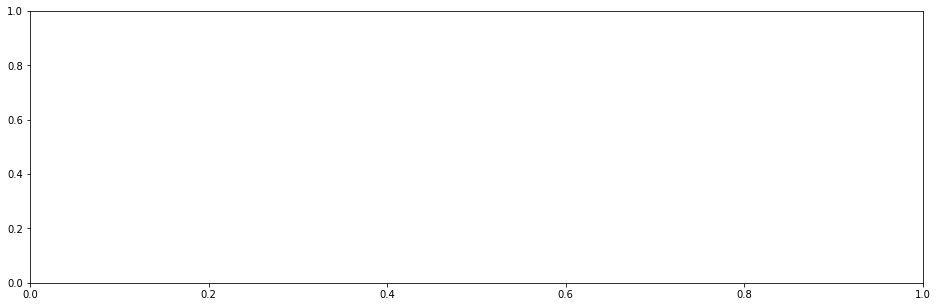

In [0]:
pltCountry_cases(['Germany', 'US'])